In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


***angry***=0

***disgust***=1

***fear***=2

***happy***=3

***nutral***=4

***sad***=5

***surprised***=6

In [2]:
data_path='data\\train'

In [3]:
img1=cv2.imread(data_path+'\\1\\Training_680349.jpg')

In [4]:
type(img1)

numpy.ndarray

In [5]:
img1.shape

(48, 48, 3)

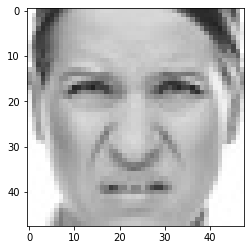

In [6]:
plt.imshow(img1)

In [7]:
classes=["0","1","2","3","4","5","6"]

In [8]:
#resize the image
def resize_img(img_array):
    new_array=cv2.resize(img_array, (224,224))
    # plt.imshow(new_array)
    # plt.show()
    return new_array

***reading all the images and converting them to array***

In [9]:
training_data=[]
def create_training_data():
    for cls in classes:
        path=os.path.join(data_path, cls)
        class_num=classes.index(cls)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path, img))
                new_array=resize_img(img_array)
                training_data.append([new_array,class_num])
            except Exception as e:
                pass       
          

In [10]:
create_training_data()

In [ ]:
len(training_data)

28709

In [ ]:
# shuffle the images
random.shuffle(training_data)

In [ ]:
X=[]
y=[]

img_size=244
for feature, label in training_data:
    X.append(feature)
    y.append(label)

X=np.array(X)     #244*244 is the size of image

In [ ]:
X.shape

(28709, 224, 224, 3)

***normalize the data***

In [ ]:
X=X/255.0           # 255.00 is the value of pure black

In [ ]:
X.shape

(28709, 224, 224, 3)

In [ ]:
Y=np.array(y)

In [ ]:
Y.shape

(28709,)

In [ ]:
# X_train,Y_train,X_test,Y_test=train_test_split(X,Y,test_size=0.50, shuffle=True)

MemoryError: Unable to allocate 16.1 GiB for an array with shape (14354, 224, 224, 3) and data type float64

***training the Deep Learning model***

In [ ]:
#model pre-trainning


model=tf.keras.applications.MobileNetV2()
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
base_input=model.layers[0].input
base_output=model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output=layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7, activation='softmax')(final_output) # 7 is for 7 different classes


In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model=keras.Model(inputs=base_input, outputs=final_output)

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
new_model.compile(loss = 'sparse_categorical_crossentropy',  optimizer = 'adam', metrics = ["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs=10)

Epoch 1/25
101/101 [==============================] - 142s 1s/step - loss: 1.6227 - accuracy: 0.3608
Epoch 2/25
101/101 [==============================] - 137s 1s/step - loss: 1.3889 - accuracy: 0.4746
Epoch 3/25
101/101 [==============================] - 138s 1s/step - loss: 1.2342 - accuracy: 0.5248
Epoch 4/25
101/101 [==============================] - 138s 1s/step - loss: 1.1363 - accuracy: 0.5735
Epoch 5/25
101/101 [==============================] - 138s 1s/step - loss: 1.0138 - accuracy: 0.6104
Epoch 6/25
101/101 [==============================] - 138s 1s/step - loss: 0.9418 - accuracy: 0.6423
Epoch 7/25
101/101 [==============================] - 138s 1s/step - loss: 0.8190 - accuracy: 0.7064
Epoch 8/25
101/101 [==============================] - 138s 1s/step - loss: 0.7279 - accuracy: 0.7309
Epoch 9/25
101/101 [==============================] - 181s 2s/step - loss: 0.6581 - accuracy: 0.7613
Epoch 10/25
101/101 [==============================] - 188s 2s/step - loss: 0.5849 - accura

In [ ]:
# new_model.save('final_model_001.h5')

In [ ]:
# my_model=tf.keras.models.load_model('final_model_001.h5')

In [ ]:
# type(my_model)

keras.engine.functional.Functional

In [ ]:
# test_img=cv2.imread('E:\\My Projects\\Facial_immotion_Detection\\data\\test\\0\\PublicTest_47244745.jpg')
# final_image=cv2.resize(test_img, (224,224))
# final_image=np.expand_dims(final_image, axis=0)
# final_image=final_image/255.0

In [ ]:
# final_image.shape

(1, 224, 224, 3)

***angry***=0

***disgust***=1

***fear***=2

***happy***=3

***nutral***=4

***sad***=5

***surprised***=6

In [ ]:
# result=my_model.predict(final_image)

1/1 [==============================] - 0s 44ms/step


In [ ]:
# np.argmax(result)

0